In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
with open('data1/business.json', encoding = "ISO-8859-1") as f:
    business_data = pd.DataFrame(json.loads(line) for line in f)

In [3]:
business_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [4]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


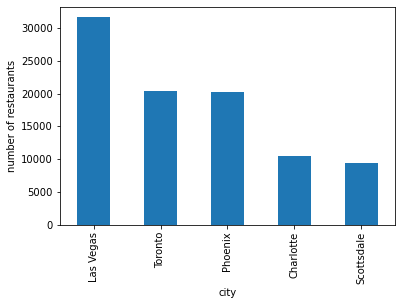

In [21]:
n_by_state = business_data.groupby("city")["business_id"].count().sort_values(ascending=False)
n_by_state= n_by_state.head()
import matplotlib.pyplot as plt
n_by_state.plot(kind='bar')
plt.ylabel('number of restaurants')
plt.show()


## Filter data by city and category

In [6]:
# Create Pandas DataFrame filters
names = business_data.columns
shape = business_data.shape
print(names)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [7]:
# Fill 'None' as Categories for the columns with no category
Correct_City = (business_data['city'] == 'Las Vegas')
Correct_Category = ~ pd.isnull(business_data['categories'])
for i in range(shape[0]):
    if Correct_Category[i]:
        Correct_Category[i] = 'Restaurants' in business_data['categories'][i]

In [8]:
filters = Correct_City & Correct_Category

In [9]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = business_data[filters]

In [10]:
CorrectCity = business_data['city'] == 'Las Vegas'
CorrectCategory = business_data['categories'].apply(lambda x: x is not None and 'Restaurants' in x)
Filter = CorrectCity&CorrectCategory
business_data[Filter]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,0,"{'Alcohol': 'u'none'', 'WiFi': 'u'no'', 'GoodF...","Mexican, Restaurants, Fast Food",None
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,,Las Vegas,NV,89109,36.128561,-115.171130,4.5,11,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",{'Friday': '18:0-0:0'}
101,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,8033 N Durango Dr,Las Vegas,NV,89131,36.307495,-115.279059,2.5,37,1,"{'OutdoorSeating': 'False', 'Alcohol': 'u'none...","Fast Food, Restaurants",None
130,Q_dh08clYUPj13GmCRzIVA,Kulinarya Express Filipino Kitchen,"7960 S Rainbow Blvd, Ste 8000A",Las Vegas,NV,89139,36.043663,-115.241881,4.0,82,0,"{'BusinessParking': '{'garage': False, 'street...","Filipino, Restaurants, Breakfast & Brunch, Foo...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209317,tv-WIUQifcp5J9pUKoiE3Q,Dragon Grille,,Las Vegas,NV,89119,36.076518,-115.153343,4.0,69,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Food, Asian Fusion, Food Trucks, Restaurants","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."
209319,kGVAle6VpDvZHlEeTB2WhA,Deliria,"8480 S Las Vegas, Ste 110",Las Vegas,NV,89123,36.035739,-115.171471,4.0,10,0,"{'WiFi': 'u'no'', 'RestaurantsTakeOut': 'True'...","Delis, Restaurants, Sandwiches, Food, Pizza",None
209367,aJK0MWXKgXIgQUCM9fqSJQ,The Original Graziano's Pizza Restaurant,8410 W Desert Inn Rd,Las Vegas,NV,89117,36.129782,-115.274674,3.5,69,0,"{'BusinessParking': '{'garage': False, 'street...","Pizza, Italian, Restaurants","{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3..."
209369,5VXlHFrYZZzj7zfZEsz5nQ,Dragon Noodle Co.,3770 Las Vegas Blvd S,Las Vegas,NV,89109,36.105289,-115.174037,3.0,279,0,"{'RestaurantsTakeOut': 'True', 'BusinessAccept...","Chinese, Restaurants","{'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3..."


In [11]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [12]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]
df_selected_business.head()

,business_id,name,categories,stars
36,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,"Mexican, Restaurants, Fast Food",2.5
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,"Burgers, Restaurants, American (Traditional), ...",3.0
86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,"Food, Food Trucks, Restaurants, Pizza",4.5
101,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,"Fast Food, Restaurants",2.5
130,Q_dh08clYUPj13GmCRzIVA,Kulinarya Express Filipino Kitchen,"Filipino, Restaurants, Breakfast & Brunch, Foo...",4.0


In [13]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business['avg_stars'] = df_selected_business['stars']
df_selected_business = df_selected_business.drop('stars', axis = 1)


c:\users\anjan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Save results to csv files

In [15]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('selected_business.csv', encoding = 'utf-8', index = False)

In [16]:
# Try reload the csv file to check if everything works fine
df_selected_business = pd.read_csv('selected_business.csv')
df_selected_business.head()

,business_id,name,categories,avg_stars
0,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,"Mexican, Restaurants, Fast Food",2.5
1,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,"Burgers, Restaurants, American (Traditional), ...",3.0
2,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,"Food, Food Trucks, Restaurants, Pizza",4.5
3,MTx-Zdl_KcU_z9G832XAjg,Taco Bell,"Fast Food, Restaurants",2.5
4,Q_dh08clYUPj13GmCRzIVA,Kulinarya Express Filipino Kitchen,"Filipino, Restaurants, Breakfast & Brunch, Foo...",4.0


#### Load review dataset

In [18]:
with open('data1/review.json', encoding = "ISO-8859-1") as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52


#### Prepare dataframes to be joined, - on business_id

In [19]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [20]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')

In [21]:
# check df_left and df_right
df_left.head()

,name,categories,avg_stars
business_id,,,
fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,"Mexican, Restaurants, Fast Food",2.5
fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,"Burgers, Restaurants, American (Traditional), ...",3.0
OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,"Food, Food Trucks, Restaurants, Pizza",4.5
MTx-Zdl_KcU_z9G832XAjg,Taco Bell,"Fast Food, Restaurants",2.5
Q_dh08clYUPj13GmCRzIVA,Kulinarya Express Filipino Kitchen,"Filipino, Restaurants, Breakfast & Brunch, Foo...",4.0


In [22]:
df_right.head()

,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,
-MhfebM0QIsKt87iDN-FNw,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,2.0,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
lbrU8StCq3yDfr-QMnGrmQ,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,1.0,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
HQl28KMwrEKHqhFrrDqVNQ,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
5JxlZaqCnk1MnbgRirs40Q,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,1.0,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
IS4cv902ykd8wj1TR0N3-A,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,4.0,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [23]:
# Join df_left and df_right. What type of join?
# inner join
df_merge = pd.merge(df_left, df_right, left_index = True, right_index = True, how = 'inner')

In [25]:
# You may want to reset the index 
df_merge.reset_index()
df_merge.head()

,name,categories,avg_stars,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,tTD3wegtsiHOjVTLgsb7FA,joe4i-lcCFd2wViA2agGKw,5.0,0,0,0,On yelp 5 stars = Woohoo! as good as it gets! ...,2018-05-08 16:39:25
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,4Ph6dJlfjDtH3LBGRwd08A,WUAidypEtNEpL8kJ3zZv7g,5.0,0,0,0,I ate the duck and it was nicely done. The oth...,2012-10-08 13:28:59
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,wZS-PPflEIXH7DplZuCrPA,OkKNJpVWPZJRmPXbR2Bl8A,5.0,0,0,0,"Walked in on a Sunday evening, no reservations...",2014-10-27 03:32:30
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,mNXglIne0uKvXn5Gwhd_ig,k65LutNApSp6r_rxmq973g,2.0,0,0,0,While on an extended stay at the Palazzo we de...,2012-10-08 14:44:04
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,eCJObv4SZupXH5TKWaUhSg,SFftbQSwHZ24ahhfj5vVxQ,2.0,0,0,0,Very busy and noisy restaurant.\nAsparagas was...,2015-10-23 13:23:34


In [26]:
# Make a filter that selects date after 2015-01-20
df_merge['date'] = pd.to_datetime(df_merge['date'])
df_merge.head()

,name,categories,avg_stars,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,tTD3wegtsiHOjVTLgsb7FA,joe4i-lcCFd2wViA2agGKw,5.0,0,0,0,On yelp 5 stars = Woohoo! as good as it gets! ...,2018-05-08 16:39:25
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,4Ph6dJlfjDtH3LBGRwd08A,WUAidypEtNEpL8kJ3zZv7g,5.0,0,0,0,I ate the duck and it was nicely done. The oth...,2012-10-08 13:28:59
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,wZS-PPflEIXH7DplZuCrPA,OkKNJpVWPZJRmPXbR2Bl8A,5.0,0,0,0,"Walked in on a Sunday evening, no reservations...",2014-10-27 03:32:30
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,mNXglIne0uKvXn5Gwhd_ig,k65LutNApSp6r_rxmq973g,2.0,0,0,0,While on an extended stay at the Palazzo we de...,2012-10-08 14:44:04
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,eCJObv4SZupXH5TKWaUhSg,SFftbQSwHZ24ahhfj5vVxQ,2.0,0,0,0,Very busy and noisy restaurant.\nAsparagas was...,2015-10-23 13:23:34


In [27]:
df_merge_filtered = df_merge.copy()
boundary = pd.to_datetime('2015-01-20')

In [28]:
# Filter the joined DataFrame and name it as df_final
df_final = df_merge_filtered[df_merge_filtered['date'] >= boundary].copy()

In [30]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final['count'] = 1
df_review_num = df_final[['count']].groupby('business_id').sum()



In [31]:
# ouput the reviews per business entity
df_review_num.head()

,count
business_id,
--9e1ONYQuAa-CB_Rrw7Tw,795
-0RkJ_uIduNLWQrphbADRw,196
-1m9o3vGRA8IBPNvNqKLmA,503
-1vfRrlnNnNJ5boOVghMPA,18
-2nfJ8yK54A7Md2RzmMR4g,8


In [32]:
df_reviews_text = df_merge_filtered[df_merge_filtered['date'] >= boundary].copy()
df_reviews_text.groupby('business_id') 
df_reviews_text.head()

,name,categories,avg_stars,review_id,user_id,stars,useful,funny,cool,text,date
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,tTD3wegtsiHOjVTLgsb7FA,joe4i-lcCFd2wViA2agGKw,5.0,0,0,0,On yelp 5 stars = Woohoo! as good as it gets! ...,2018-05-08 16:39:25
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,eCJObv4SZupXH5TKWaUhSg,SFftbQSwHZ24ahhfj5vVxQ,2.0,0,0,0,Very busy and noisy restaurant.\nAsparagas was...,2015-10-23 13:23:34
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,c9lAv_pZYK6r1umrzAhnVA,3RGKgFproU4CflJVkAZw4w,2.0,1,0,1,Rib eye steak for $51 should be pretty darn go...,2017-03-27 04:39:46
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,WYNusZjgf6BsISk829MQKw,y4O_c6UUAAtPb3Uk-T4t8A,5.0,0,0,0,A great culinary experience from start to fini...,2017-08-16 06:41:49
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,EropXHcE97zioQ17FJ7Hqg,kmXHMCtkFc1PRB7dD3gCaA,5.0,1,0,1,Amazing restaurant. Lets start off by saying r...,2016-05-07 05:40:08


In [33]:
df_reviews_merge = pd.merge(df_reviews_text, df_review_num, how = 'inner', left_index = True, right_index = True)
df_reviews_merge.head()

,name,categories,avg_stars,review_id,user_id,stars,useful,funny,cool,text,date,count
business_id,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,tTD3wegtsiHOjVTLgsb7FA,joe4i-lcCFd2wViA2agGKw,5.0,0,0,0,On yelp 5 stars = Woohoo! as good as it gets! ...,2018-05-08 16:39:25,795
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,eCJObv4SZupXH5TKWaUhSg,SFftbQSwHZ24ahhfj5vVxQ,2.0,0,0,0,Very busy and noisy restaurant.\nAsparagas was...,2015-10-23 13:23:34,795
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,c9lAv_pZYK6r1umrzAhnVA,3RGKgFproU4CflJVkAZw4w,2.0,1,0,1,Rib eye steak for $51 should be pretty darn go...,2017-03-27 04:39:46,795
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,WYNusZjgf6BsISk829MQKw,y4O_c6UUAAtPb3Uk-T4t8A,5.0,0,0,0,A great culinary experience from start to fini...,2017-08-16 06:41:49,795
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,EropXHcE97zioQ17FJ7Hqg,kmXHMCtkFc1PRB7dD3gCaA,5.0,1,0,1,Amazing restaurant. Lets start off by saying r...,2016-05-07 05:40:08,795


In [35]:
# Save to Merged_dataset_recent.csv for your next task
df_reviews_merge.to_csv('Merged_dataset_recent.csv', encoding = 'utf-8', index = True)

In [36]:
df_read_reviews = pd.read_csv('Merged_dataset_recent.csv')
df_read_reviews.head()

,business_id,name,categories,avg_stars,review_id,user_id,stars,useful,funny,cool,text,date,count
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,tTD3wegtsiHOjVTLgsb7FA,joe4i-lcCFd2wViA2agGKw,5.0,0,0,0,On yelp 5 stars = Woohoo! as good as it gets! ...,2018-05-08 16:39:25,795
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,eCJObv4SZupXH5TKWaUhSg,SFftbQSwHZ24ahhfj5vVxQ,2.0,0,0,0,Very busy and noisy restaurant.\nAsparagas was...,2015-10-23 13:23:34,795
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,c9lAv_pZYK6r1umrzAhnVA,3RGKgFproU4CflJVkAZw4w,2.0,1,0,1,Rib eye steak for $51 should be pretty darn go...,2017-03-27 04:39:46,795
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,WYNusZjgf6BsISk829MQKw,y4O_c6UUAAtPb3Uk-T4t8A,5.0,0,0,0,A great culinary experience from start to fini...,2017-08-16 06:41:49,795
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Seafood, Cajun/Creole, Restaurants, Steakhouses",4.0,EropXHcE97zioQ17FJ7Hqg,kmXHMCtkFc1PRB7dD3gCaA,5.0,1,0,1,Amazing restaurant. Lets start off by saying r...,2016-05-07 05:40:08,795


In [148]:
df_read_reviews.shape

(348016, 14)